```
python {CIRCRIP_PATH}/circRIP.py EnrichedcircRNA \
            -ip_circ {input.ip_circ} \
            -input_circ {input.in_circ} \
            -gtf {input.gtf} \
            -ip_bam {input.ip_bam} \
            -input_bam {input.in_bam} \
            -prefix {output} \
            -G {input.genome}
```

[zero inflation](https://easystats.github.io/performance/reference/check_zeroinflation.html)
[chi square test for zero inflation](https://stats.stackexchange.com/questions/118322/how-to-test-for-zero-inflation-in-a-dataset)

[cgam and stepwise AIC](https://online.stat.psu.edu/stat504/lesson/8/8.2/8.2.2)
[heteroscedasticity](https://timeseriesreasoning.com/contents/introduction-to-heteroscedasticity/)
[Poisson regression](http://dwoll.de/rexrepos/posts/regressionPoisson.html)
[zero inflation poisson](https://stats.oarc.ucla.edu/r/dae/zip/)

cat /home/hsher/scratch/circ_nextera*/output/*.bed | sort -k1,1 -k2,2n -k3,3n | uniq > ~/scratch/all_circles.bed
bedtools nuc -s -fi /home/hsher/gencode_coords/GRCh38.primary_assembly.genome.fa -bed ~/scratch/all_circles.bed > ~/scratch/circles_gc_content.nuc

In [1]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plot_params import *
from pathlib import Path
import numpy as np

In [2]:
gtf_rep1 = '/home/hsher/scratch/circ_nextera_iter8/output/PP_Input1.gtf'
gtf_rep2 = '/home/hsher/scratch/circ_nextera_iter8/output/PP_Input2.gtf'

# gtf_rep1 = '/projects/ps-yeolab5/hsher/circ_outputs/HEK_rar11.gtf'
# gtf_rep2 = '/projects/ps-yeolab5/hsher/circ_outputs/circseq-bm-rar11-nxt.gtf'

# gtf_rep1 = '/home/hsher/scratch/circ_nextera_iter8/output/PP_Monosome1.gtf'
# gtf_rep2 = '/home/hsher/scratch/circ_nextera_iter8/output/PP_Input1.gtf'

gc_content = '/home/hsher/scratch/circles_gc_content.nuc'



# beta-binom coef

In [3]:
coef = pd.read_csv('/home/hsher/scratch/rar11_input.coef.tsv', sep = '\t', index_col = 0)['value']

In [4]:
from scipy.special import logit
logit(0.7)

0.8472978603872034

In [5]:
from scipy.special import expit
rho = expit(coef['rho']) # the inverse of logit.


In [6]:
rho

0.00010154881997079985

In [7]:
def get_alpha_beta(mu, rho):
    #https://dcgerard.github.io/updog/reference/betabinom.html
    
    alpha = mu*(1-rho)/rho
    beta=(1-mu)*(1-rho)/rho
    
    return alpha, beta
    

# is GC content a problem

In [8]:
gc_df = pd.read_csv(gc_content, sep = '\t')

In [9]:
gc_df.head()

,#1_usercol,2_usercol,3_usercol,4_usercol,5_usercol,6_usercol,7_pct_at,8_pct_gc,9_num_A,10_num_C,11_num_G,12_num_T,13_num_N,14_num_oth,15_seq_len
0,chr1,185582,187128,chr1:185582|187128,.,-,0.419793,0.580207,299,452,445,350,0,0,1546
1,chr1,633563,634095,chr1:633563|634095,.,-,0.578947,0.421053,128,47,177,180,0,0,532
2,chr1,633567,634067,chr1:633567|634067,.,-,0.588000,0.412000,123,44,162,171,0,0,500
3,chr1,633567,634075,chr1:633567|634075,.,-,0.584646,0.415354,124,45,166,173,0,0,508
4,chr1,633567,634095,chr1:633567|634095,.,-,0.581439,0.418561,128,47,174,179,0,0,528


In [10]:
fcounts = '/home/hsher/scratch/circ_nextera_iter8/output/featureCount_output.tsv'

In [11]:
feature_counts = pd.read_csv(fcounts, sep = '\t', comment = '#')

In [12]:
feature_counts.head()

,Geneid,Chr,Start,End,Strand,Length,output/bams/PP_Monosome1.Aligned.sortedByCoord.out.bam,output/bams/PP_Polysome1.Aligned.sortedByCoord.out.bam,output/bams/PP_Monosome2.Aligned.sortedByCoord.out.bam,output/bams/PP_Polysome2.Aligned.sortedByCoord.out.bam,output/bams/PP_Input1.Aligned.sortedByCoord.out.bam,output/bams/PP_Input2.Aligned.sortedByCoord.out.bam
0,DDX11L1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,11869;12010;12179;12613;12613;12975;13221;1322...,12227;12057;12227;12721;12697;13052;14409;1337...,+;+;+;+;+;+;+;+;+,1735,4,0,0,0,2,1
1,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14404;15005;15796;16607;16858;17233;17606;1791...,14501;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1351,66,0,41,36,18,26
2,MIR6859-1,chr1,17369,17436,-,68,1,0,1,0,1,0
3,MIR1302-2HG,chr1;chr1;chr1;chr1;chr1,29554;30267;30564;30976;30976,30039;30667;30667;31097;31109,+;+;+;+;+,1021,0,0,0,2,1,4
4,MIR1302-2,chr1,30366,30503,+,138,0,0,0,0,0,0


In [13]:

def read_ciri_gtf(fname):
    bed = BedTool(fname)
    df = bed.to_dataframe()
    # filter for non-entries
    stat = df.loc[df['seqname'].str.contains('##'), 'seqname'].str.split(': ', expand = True)
    df = df.loc[~df['seqname'].str.contains('##')].reset_index()
    
    # get attributes
    attrs = pd.DataFrame([i.attrs for i in bed])
    data = pd.concat([df, attrs], axis = 1)
    
    data['bsj']=data['bsj'].astype(float)
    data['fsj']=data['fsj'].astype(float)
    data['junc_ratio']=data['junc_ratio'].astype(float)
    
    # stat
    
    
    return data, stat.set_index(0)[1].iloc[1:-1].astype(int)

In [14]:
r1_gtf, r1_stat = read_ciri_gtf(gtf_rep1)
r2_gtf, r2_stat = read_ciri_gtf(gtf_rep2)

In [15]:
r1_gtf.columns

Index(['index', 'seqname', 'source', 'feature', 'start', 'end', 'score',
       'strand', 'frame', 'attributes', 'circ_id', 'circ_type', 'bsj', 'fsj',
       'junc_ratio', 'gene_id', 'gene_name', 'gene_type'],
      dtype='object')

In [16]:
cols = ['seqname', 'source', 'feature', 'start', 'end',
       'strand', 'frame', 'circ_id', 'circ_type','gene_id', 'gene_name', 'gene_type']
anno_df = pd.concat([r1_gtf[cols], r2_gtf[cols]], axis = 0).drop_duplicates()

cols = ['circ_id', 'bsj', 'fsj']

counts = r1_gtf[cols].merge(r2_gtf[cols], left_on = 'circ_id', right_on = 'circ_id', how = 'outer',
            suffixes = ('_rep1', '_rep2')).fillna(0)

In [17]:
counts = counts.merge(anno_df, left_on = 'circ_id', right_on = 'circ_id')

In [18]:
counts['feature_counts_rep1']=counts['gene_name'].map(feature_counts.set_index('Geneid')['output/bams/PP_Input1.Aligned.sortedByCoord.out.bam'])
counts['feature_counts_rep2']=counts['gene_name'].map(feature_counts.set_index('Geneid')['output/bams/PP_Input2.Aligned.sortedByCoord.out.bam'])

In [19]:
counts['circRNA_gc']=counts['circ_id'].map(gc_df.set_index('4_usercol')['8_pct_gc'])

In [20]:
counts

,circ_id,bsj_rep1,fsj_rep1,bsj_rep2,fsj_rep2,seqname,source,feature,start,end,strand,frame,circ_type,gene_id,gene_name,gene_type,feature_counts_rep1,feature_counts_rep2,circRNA_gc
0,chr1:746695|749381,29.0,4.0,24.0,42.0,chr1,CIRIquant,circRNA,746695.0,749381.0,-,.,intron,"ENSG00000228327.3,ENSG00000230021.10","AL669831.1,AL669831.3","transcribed_unprocessed_pseudogene,transcribed...",NaN,NaN,0.454207
1,chr1:805799|810170,45.0,8.0,34.0,16.0,chr1,CIRIquant,circRNA,805799.0,810170.0,-,.,exon,"ENSG00000230021.10,ENSG00000230092.7","AL669831.3,AL669831.4","transcribed_processed_pseudogene,transcribed_u...",NaN,NaN,0.386868
2,chr1:915319|915949,1.0,51.0,1.0,43.0,chr1,CIRIquant,circRNA,915319.0,915949.0,+,.,intron,ENSG00000272438.1,AL645608.6,lncRNA,86.0,106.0,0.595238
3,chr1:955923|957273,2.0,222.0,2.0,220.0,chr1,CIRIquant,circRNA,955923.0,957273.0,-,.,exon,ENSG00000188976.11,NOC2L,protein_coding,1654.0,1737.0,0.585926
4,chr1:1084353|1086012,1.0,30.0,0.0,0.0,chr1,CIRIquant,circRNA,1084353.0,1086012.0,-,.,exon,ENSG00000131591.17,C1orf159,protein_coding,131.0,184.0,0.680530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115020,chrX:155334371|155335249,0.0,0.0,3.0,16.0,chrX,CIRIquant,circRNA,155334371.0,155335249.0,-,.,exon,"ENSG00000224216.1,ENSG00000155962.13","AC234781.1,CLIC2","lncRNA,protein_coding",NaN,NaN,0.446469
115021,chrX:155415575|155441658,0.0,0.0,1.0,17.0,chrX,CIRIquant,circRNA,155415575.0,155441658.0,-,.,intergenic,NaN,NaN,NaN,NaN,NaN,0.405091
115022,chrX:155415575|155507134,0.0,0.0,6.0,0.0,chrX,CIRIquant,circRNA,155415575.0,155507134.0,-,.,intron,"ENSG00000277745.1,ENSG00000277150.2,ENSG000001...","H2AB3,F8A3,TMLHE","protein_coding,protein_coding,protein_coding",NaN,NaN,0.402626
115023,chrX:155506898|155511792,0.0,0.0,4.0,357.0,chrX,CIRIquant,circRNA,155506898.0,155511792.0,-,.,exon,ENSG00000185973.12,TMLHE,protein_coding,1957.0,2253.0,0.364937


# exploring features

In [21]:
counts['p_bsj_rep1'] = counts['bsj_rep1']/(counts['bsj_rep1']+counts['bsj_rep2'])
counts['p_fsj_rep1'] = counts['fsj_rep1']/(counts['fsj_rep1']+counts['fsj_rep2'])
counts['p_fcount_rep1'] = counts['feature_counts_rep1']/(counts['feature_counts_rep1']+counts['feature_counts_rep2'])

<AxesSubplot:>

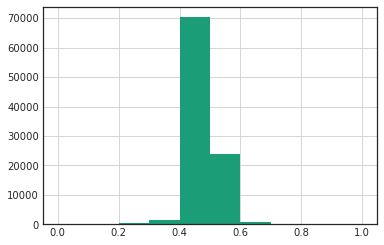

In [22]:
counts['p_fcount_rep1'].hist()

In [23]:
pd.concat([r1_stat, r2_stat], axis =1).T

,##Total_Reads,##Mapped_Reads,##Circular_Reads
1,111727632,92274328,1848988
1,95355938,76143386,2005830


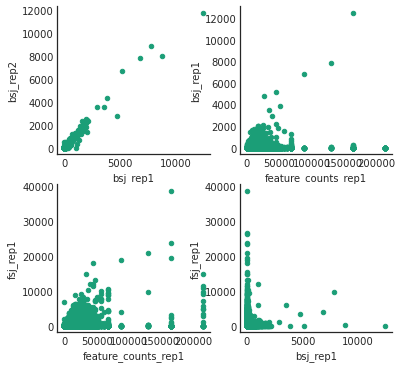

In [24]:
f, ax = plt.subplots(2,2, figsize = (6,6))
ax = ax.flatten()
counts.plot.scatter(x = 'bsj_rep1', y = 'bsj_rep2',ax = ax[0])
counts.plot.scatter(x = 'feature_counts_rep1', y = 'bsj_rep1', ax = ax[1])
counts.plot.scatter(x = 'feature_counts_rep1', y = 'fsj_rep1', ax = ax[2])
counts.plot.scatter(x = 'bsj_rep1', y = 'fsj_rep1', ax = ax[3])
sns.despine()

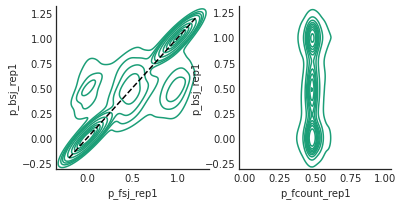

In [25]:
f, ax = plt.subplots(1,2, figsize = (6,3))
ax = ax.flatten()
sns.kdeplot(data=counts.sample(5000),y = 'p_bsj_rep1', x = 'p_fsj_rep1',ax = ax[0])
sns.kdeplot(data=counts.sample(5000),y = 'p_bsj_rep1', x = 'p_fcount_rep1',ax = ax[1])
ax[0].plot([-0.2,1.2], [-0.2,1.2], '--', color = 'black')
sns.despine()

In [26]:
from scipy.stats import pearsonr
non_nan = counts.dropna(subset=['p_fsj_rep1', 'p_bsj_rep1'])
pearsonr(non_nan['p_fsj_rep1'], non_nan['p_bsj_rep1'])

(0.8698699780626105, 0.0)

In [27]:
counts['gc_bin'] = pd.qcut(counts['circRNA_gc'], q = 10)

In [28]:
gc_binned_counts = counts.groupby(by = 'gc_bin')[['bsj_rep1', 'bsj_rep2']].sum()
gc_binned_r1_frac = gc_binned_counts['bsj_rep1'].div(gc_binned_counts.sum(axis = 1))

Text(0, 0.5, 'p BSJ rep1')

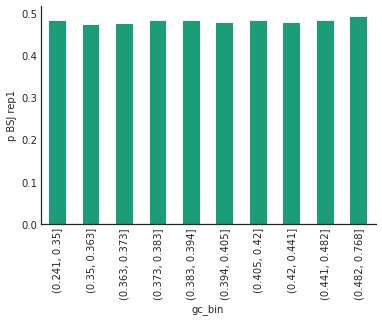

In [29]:
gc_binned_r1_frac.plot.bar()
sns.despine()
plt.ylabel('p BSJ rep1')

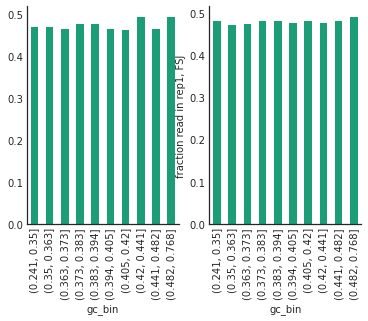

In [30]:
f, ax = plt.subplots(1,2)
gc_bias = counts.groupby(by = 'gc_bin')[['bsj_rep1', 'bsj_rep2', 'fsj_rep1', 'fsj_rep2']].sum()
(gc_bias['bsj_rep1']/gc_bias[['bsj_rep1', 'bsj_rep2']].sum(axis = 1)).plot.bar(ax = ax[1])
plt.ylabel('fraction read in rep1, BSJ')

(gc_bias['fsj_rep1']/gc_bias[['fsj_rep1', 'fsj_rep2']].sum(axis = 1)).plot.bar(ax = ax[0])
plt.ylabel('fraction read in rep1, FSJ')
sns.despine()

In [31]:
gc_bin_mean = (gc_bias['fsj_rep1']/gc_bias[['fsj_rep1', 'fsj_rep2']].sum(axis = 1))
counts['gc_specific_depth_mean']=counts['gc_bin'].map(gc_bin_mean).astype(float)

# Plot the variablility between 2 reps

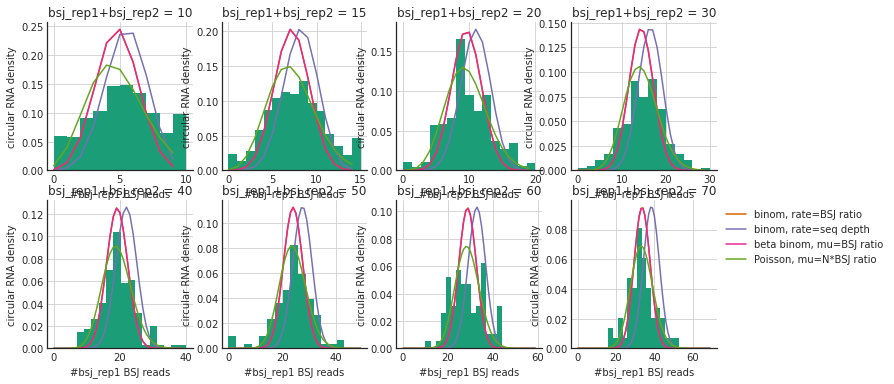

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import betabinom
from scipy.stats import poisson

r1_handle = 'bsj_rep1'
r2_handle = 'bsj_rep2'
total_bsj = counts[[r1_handle, r2_handle]].sum(axis = 0)
bsj_rate = total_bsj[r1_handle]/total_bsj.sum()


seqdepth_rate = r1_stat['##Mapped_Reads']/(r2_stat['##Mapped_Reads']+r1_stat['##Mapped_Reads'])

f, axes = plt.subplots(2,4, figsize = (12,6))
for cov, ax in zip([10,15,20,30,40,50,60,70], axes.flatten()):
    
    counts.loc[counts[[r1_handle, r2_handle]].sum(axis = 1)==cov, r1_handle].hist(
        ax = ax, density = True, bins = min(cov, 15))
    ax.set_title(f'{r1_handle}+{r2_handle} = {cov}')
    ax.set_xlabel(f'#{r1_handle} BSJ reads')
    ax.set_ylabel('circular RNA density')
    
    ax.plot(binom(cov, bsj_rate).pmf(np.arange(cov)), label = 'binom, rate=BSJ ratio')
    ax.plot(binom(cov, seqdepth_rate).pmf(np.arange(cov)), label = 'binom, rate=seq depth')
    
    alpha_bsj, beta_bsj = get_alpha_beta(bsj_rate, rho)
    bb_bsj=betabinom(cov, a=alpha_bsj, b = beta_bsj)
    ax.plot(bb_bsj.pmf(np.arange(cov)), label = 'beta binom, mu=BSJ ratio')
    
    poi_bsj= poisson(cov*bsj_rate)
    ax.plot(poi_bsj.pmf(np.arange(cov)), label = 'Poisson, mu=N*BSJ ratio')
    
sns.despine()
ax.legend(bbox_to_anchor = (1,1))

In [33]:
counts.to_csv('/home/hsher/scratch/rar11_input.tsv', sep = '\t')

# Judge model fit by QQ plot

In [34]:
counts['total_bsj']=counts['bsj_rep1']+counts['bsj_rep2']
counts['pvalue']=counts.apply(lambda row: 1-betabinom(row['total_bsj'], a=alpha_bsj, b = beta_bsj).cdf(row['bsj_rep1']), axis =1)
counts['pvalue-poisson']=counts.apply(lambda row: 1-poisson(row['total_bsj']*bsj_rate).cdf(row['bsj_rep1']), axis =1)

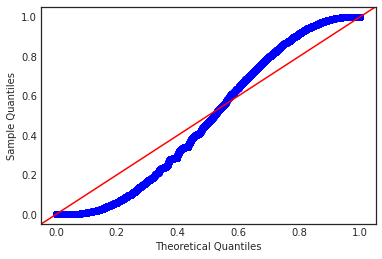

In [35]:
import statsmodels.api as sm
import scipy
p = sm.qqplot(counts.loc[counts['total_bsj']>30,'pvalue'], line ='45',
             dist=scipy.stats.uniform)

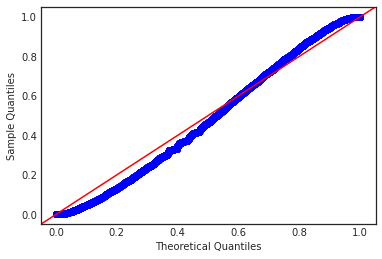

In [36]:
p = sm.qqplot(counts.loc[counts['total_bsj']>30,'pvalue-poisson'], 
              dist=scipy.stats.uniform,
              line ='45')